<a href="https://colab.research.google.com/github/Vedant-Agarwal/nn-from-first-principles/blob/main/notebooks/01_single_neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 1 — A Single Neuron: Celsius → Fahrenheit

In this notebook, we build the smallest possible neural network:
a **single neuron** with:

- one input (Celsius)
- one output (Fahrenheit)
- one weight **W**
- one bias **b**

Our goals:

1. Understand the forward pass  
2. Compute loss (MSE)  
3. Derive gradients manually  
4. Perform gradient descent step-by-step  
5. Visualize the learning process  

This notebook builds the conceptual foundation for all deep learning.


In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [21]:
# Celsius values
C = np.linspace(-40, 100, 100)   # 100 values between -40 and 100
F = C * 1.8 + 32


print(C, F)


[-40.         -38.58585859 -37.17171717 -35.75757576 -34.34343434
 -32.92929293 -31.51515152 -30.1010101  -28.68686869 -27.27272727
 -25.85858586 -24.44444444 -23.03030303 -21.61616162 -20.2020202
 -18.78787879 -17.37373737 -15.95959596 -14.54545455 -13.13131313
 -11.71717172 -10.3030303   -8.88888889  -7.47474747  -6.06060606
  -4.64646465  -3.23232323  -1.81818182  -0.4040404    1.01010101
   2.42424242   3.83838384   5.25252525   6.66666667   8.08080808
   9.49494949  10.90909091  12.32323232  13.73737374  15.15151515
  16.56565657  17.97979798  19.39393939  20.80808081  22.22222222
  23.63636364  25.05050505  26.46464646  27.87878788  29.29292929
  30.70707071  32.12121212  33.53535354  34.94949495  36.36363636
  37.77777778  39.19191919  40.60606061  42.02020202  43.43434343
  44.84848485  46.26262626  47.67676768  49.09090909  50.50505051
  51.91919192  53.33333333  54.74747475  56.16161616  57.57575758
  58.98989899  60.4040404   61.81818182  63.23232323  64.64646465
  66.060606

## The Single Neuron Model

We define:

\[
\hat{y} = W \cdot x + b
\]

where:
- \( W \) = weight  
- \( b \) = bias  
- \( x \) = Celsius  
- \( \hat{y} \) = predicted Fahrenheit  


In [29]:
# Initialize weight and bias
W = 0.0
b = 0.0


print("Initial W:", W)
print("Initial b:", b)


Initial W: 0.0
Initial b: 0.0


In [30]:
def forward(x):
    return W * x + b

preds = forward(C)
preds


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Mean Squared Error (MSE)

\[
L = \frac{1}{n}\sum (y - \hat{y})^2
\]

This punishes large errors more than small ones.


In [31]:
def mse(y, y_pred):
    return np.mean((y - y_pred)**2)

loss = mse(F, preds)
loss


np.float64(12794.90909090909)

## Computing Gradients by Hand

For a single example:

\[
\hat{y} = Wx + b
\]
\[
L = (y - \hat{y})^2
\]

Derivative w.r.t. weight:

\[
\frac{\partial L}{\partial W} = -2x(y - \hat{y})
\]

Derivative w.r.t. bias:

\[
\frac{\partial L}{\partial b} = -2(y - \hat{y})
\]

We extend this to all examples by averaging over the batch.


In [32]:
def compute_gradients(x, y):
    y_pred = forward(x)
    error = y - y_pred

    dW = (-2/len(x)) * np.sum(x * error)
    db = (-2/len(x)) * np.sum(error)
    return dW, db


In [36]:
learning_rate = 0.0001
loss_history = []

for epoch in range(50000):  # Recommended: 50k–100k steps
    dW, db = compute_gradients(C, F)

    # Clip gradients for stability
    dW = np.clip(dW, -1000, 1000)
    db = np.clip(db, -1000, 1000)

    # Update
    W -= learning_rate * dW
    b -= learning_rate * db

    curr_loss = mse(F, forward(C))
    loss_history.append(curr_loss)

    if epoch % 5000 == 0:
        print(f"Epoch {epoch}: Loss = {curr_loss:.6f}")


Epoch 0: Loss = 304.496595
Epoch 5000: Loss = 83.108235
Epoch 10000: Loss = 22.683271
Epoch 15000: Loss = 6.191092
Epoch 20000: Loss = 1.689775
Epoch 25000: Loss = 0.461201
Epoch 30000: Loss = 0.125879
Epoch 35000: Loss = 0.034357
Epoch 40000: Loss = 0.009377
Epoch 45000: Loss = 0.002559


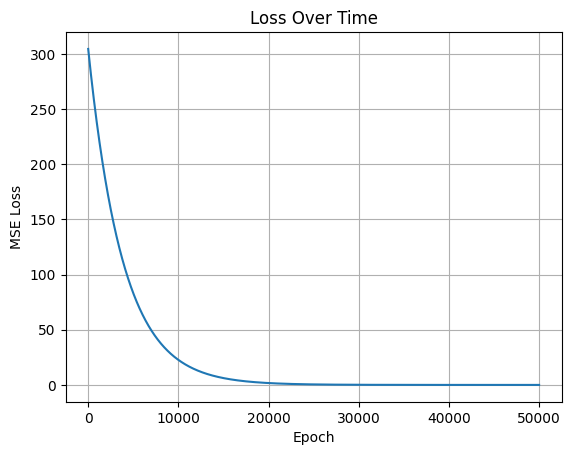

In [37]:
plt.plot(loss_history)
plt.title("Loss Over Time")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid()
plt.show()


In [38]:
print("Trained W:", W)
print("Trained b:", b)

# Test prediction
test_val = 98.6
print(f"{test_val}°F =", forward((test_val-32)*5/9), "°F predicted by model")


Trained W: 1.8003835748083312
Trained b: 31.96719564993057
98.6°F = 98.58138791783882 °F predicted by model


Experiment with the learning rate

Try values like 0.001, 0.0001, 0.00001.

Observe when the model becomes unstable, slow, or perfect.

Plot loss curves for comparison.

Increase or decrease the dataset size

Try 10 points, 50 points, 500 points.

How does dataset size affect stability and convergence?

Test different initializations

Set W and b to:

0,

small random values (e.g., ±0.01),

large random values (±5 or ±10).

Which initializations converge reliably? Which explode or stagnate?

Visualize model behavior

Plot the line before training (initial W, b).

Plot the line after training.

Compare the slopes and intercepts visually.

Derive alternative gradients by hand
Derive ∂L/∂W and ∂L/∂b for:

L1 loss:
𝐿
=
∣
𝑦
−
𝑦
^
∣
L=∣y−
y
^
	​

∣

Huber loss:

𝐿
=
{
1
2
(
𝑦
−
𝑦
^
)
2

∣
𝑦
−
𝑦
^
∣
<
𝛿


𝛿
∣
𝑦
−
𝑦
^
∣
−
1
2
𝛿
2

otherwise
L={
2
1
	​

(y−
y
^
	​

)
2
δ∣y−
y
^
	​

∣−
2
1
	​

δ
2
	​

∣y−
y
^
	​

∣<δ
otherwise
	​


Train a slightly more expressive model
Modify the prediction equation to a quadratic form:

𝑦
^
=
𝑊
1
𝑥
+
𝑊
2
𝑥
2
+
𝑏
y
^
	​

=W
1
	​

x+W
2
	​

x
2
+b

Implement the new forward pass

Compute new gradients

Train it on the same Celsius → Fahrenheit data

Does the model still converge to a straight-line solution?

(Optional) Add noise to the data

Add random noise to F (e.g., ±2°F).

See how robust the trained model becomes.

Does the learned line still approximate the true formula?

(Optional) Explore learning rate schedules

Try step decay or exponential decay.

Does training converge faster or more smoothly?

# ✔ Summary

In this notebook, we:

- built a neuron from scratch  
- defined weight & bias explicitly  
- computed the forward pass  
- calculated MSE loss  
- derived gradients manually  
- performed gradient descent  
- visualized training progress  

This single neuron is the seed for everything to come—multi-layer networks, deep learning architectures, and eventually Transformers.

Next up: **Notebook 2 — Multi-Neuron Models & Activations**
